In [ ]:
import torch
import torch.nn as nn
import h5py
import numpy as np
import torchvision.transforms.functional as TF
import torchvision
from torchvision.utils import save_image
from PIL import Image

from __init__ import *

In [ ]:
def h5toNumpy(filepath):
    f = h5py.File(filepath, 'r')
    image = np.array(f['dataset'])
    energies = np.array(f['energies'])
    f.close()
    return image

toTensor = torchvision.transforms.ToTensor()

inTrainImage = h5toNumpy(parentdir + "\\" + "data\\panagia.h5").astype(np.float32)
inTrainImage = torch.from_numpy(inTrainImage)
inTrainImage = torch.reshape(inTrainImage, [21, 33, 2048])
inTrainImage = torch.swapaxes(inTrainImage,0,2);	inTrainImage = np.swapaxes(inTrainImage,1,2)
inTrainImage = torch.rot90(inTrainImage, 2, (2,1))

outTrainImage = toTensor(Image.open(parentdir + "\\" + "data\panagia.png").convert('RGB'))

inTestImage = h5toNumpy(parentdir + "\\" + "data\\jesus.h5").astype(np.float32)
inTestImage = torch.from_numpy(inTestImage)
inTestImage = torch.reshape(inTestImage, [31, 46, 2048])
inTestImage = torch.swapaxes(inTestImage,0,2);	inTestImage = np.swapaxes(inTestImage,1,2)
inTestImage = torch.rot90(inTestImage, 2, (2,1))

outTestImage = toTensor(Image.open(parentdir + "\\" + "data\jesus.png").convert('RGB'))

In [ ]:
inTestImage = inTestImage[60:900,:,:]

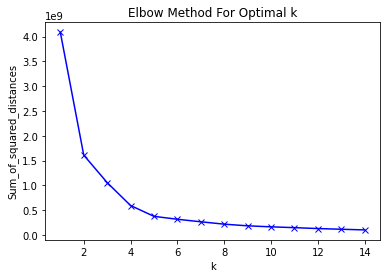

In [51]:
inTestImageFlat = inTestImage.reshape(840, 31*46)
inTestImageOriginal = inTestImageFlat.reshape(840,31,46)

from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(inTestImageFlat)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

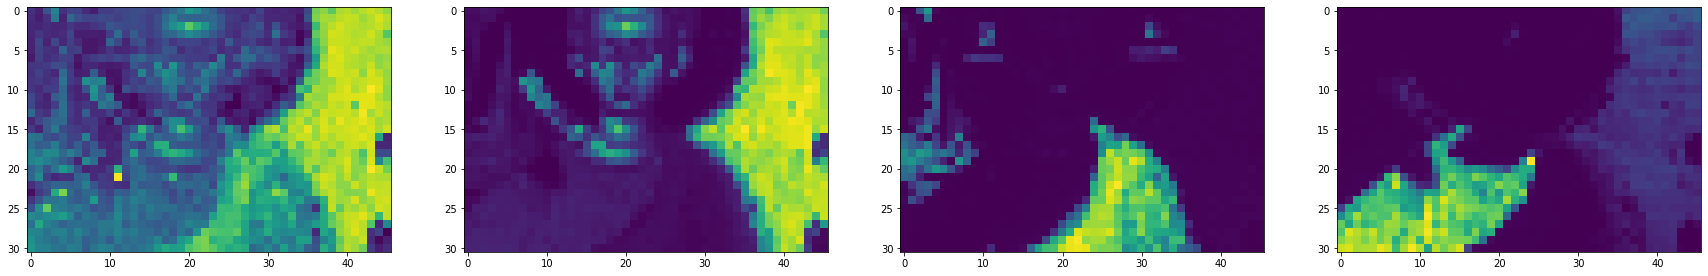

In [56]:
km = KMeans(n_clusters=4)
km = km.fit(inTestImageFlat)

clusters = []
for cluster in km.cluster_centers_:
    clusters.append(cluster.reshape(31,46))

fix, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,10))

ax[0].imshow(clusters[0])
ax[1].imshow(clusters[1])
ax[2].imshow(clusters[2])
ax[3].imshow(clusters[3])